# Phase-3 Handling Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import math

In [2]:
auto_org = pd.read_csv('auto_scout_missing.csv')

In [3]:
df = auto_org.copy()

In [4]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013,80000,83450
prev_owner,2,1,1
hp,66,141,85
inspection_new,1,0,0
warranty,0,0,0
body_color,Black,Red,Black


## make model - price analysis

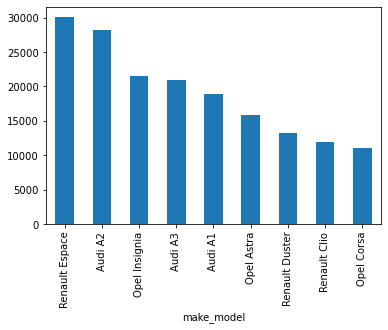

In [5]:
df.groupby('make_model').price.mean().sort_values(ascending=False).plot.bar(x='make_model', y='price');

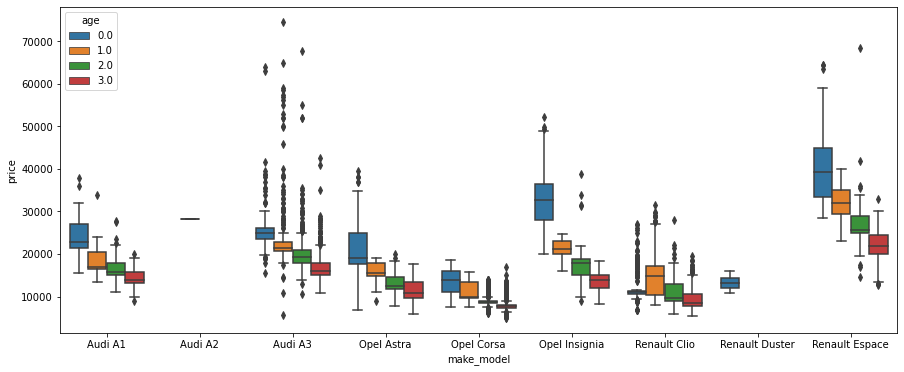

In [6]:
plt.figure(figsize=(15,6))
sns.boxplot(y='price',data=df, x='make_model', hue='age');

In [7]:
last4 = df[(df['make_model']=='Audi A3') & (df['age']==1) & (df['body_type']=='Sedans')].price.sort_values().tail(4).index

In [8]:
df.iloc[last4]

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,...,entertainment_media,extras,safety_security,gears,electricity_consumption,age,new_used,fuel_type,consumption_comb,upholstery_material
3593,Audi A3,Sedans,58500,VAT undeductible,10000.0,1.0,294.0,0,0.0,White,...,'Radio','Alloy wheels',"'Adaptive Cruise Control', 'Alarm system', 'Ce...",7.0,0,1.0,Used,benzine,8.3,NaN
3594,Audi A3,Sedans,58990,VAT deductible,7500.0,1.0,228.0,0,0.0,Blue,...,"'Bluetooth', 'CD player', 'Hands-free equipmen...","'Alloy wheels', 'Sport package', 'Sport seats'...","'ABS', 'Adaptive Cruise Control', 'Adaptive he...",7.0,0,1.0,Used,benzine,6.5,Full leather
3587,Audi A3,Sedans,64900,VAT undeductible,35000.0,1.0,294.0,0,0.0,Grey,...,'Radio','Alloy wheels',"'Adaptive Cruise Control', 'Alarm system', 'Ce...",7.0,0,1.0,Used,benzine,8.3,NaN
3648,Audi A3,Sedans,74600,VAT deductible,13000.0,1.0,294.0,0,0.0,Black,...,"'CD player', 'On-board computer', 'Radio'","'Alloy wheels', 'Sport seats', 'Sport suspension'","'ABS', 'Alarm system', 'Central door lock', 'D...",7.0,0,1.0,Used,benzine,8.3,Full leather


## km 

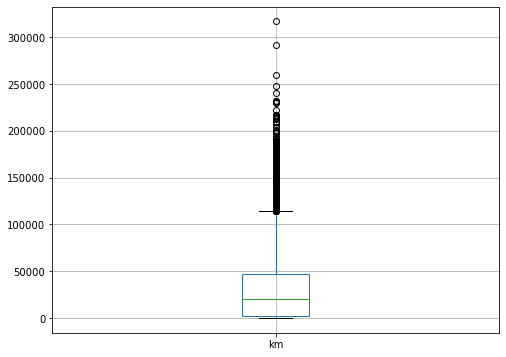

In [9]:
plt.figure(figsize=(8,6))
df.boxplot(column = ['km']);

## hp

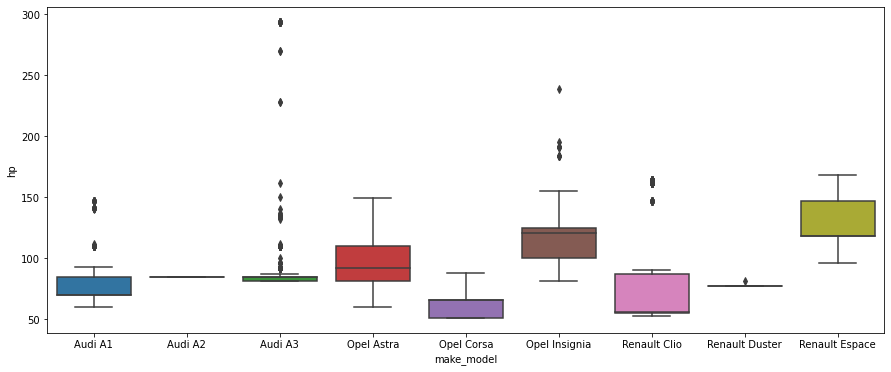

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(y='hp',data=df, x='make_model');

In [11]:
df[df['hp']<50]

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,...,entertainment_media,extras,safety_security,gears,electricity_consumption,age,new_used,fuel_type,consumption_comb,upholstery_material
3913,Audi A3,Sedans,20440,VAT undeductible,24000.0,1.0,9.0,0,0.0,Black,...,NaN,NaN,NaN,7.0,0,2.0,Used,diesel,3.8,NaN
6005,Opel Astra,Station wagon,11600,VAT undeductible,73860.0,1.0,1.0,0,0.0,Black,...,"'Bluetooth', 'On-board computer', 'Radio', 'USB'",NaN,"'Alarm system', 'Central door lock', 'Driver-s...",6.0,0,2.0,Used,benzine,4.4,NaN
6034,Opel Astra,Station wagon,11600,VAT undeductible,76010.0,1.0,1.0,0,0.0,Silver,...,"'Bluetooth', 'On-board computer', 'Radio', 'USB'",NaN,"'Alarm system', 'Central door lock', 'Driver-s...",6.0,0,2.0,Used,benzine,4.4,NaN
6945,Opel Astra,Station wagon,11900,VAT undeductible,70090.0,1.0,1.0,0,0.0,Black,...,"'Bluetooth', 'CD player', 'On-board computer',...",NaN,"'Central door lock', 'Driver-side airbag', 'El...",6.0,0,2.0,Used,diesel,4.5,NaN
7013,Opel Astra,Sedans,11700,VAT undeductible,79993.0,1.0,1.0,0,0.0,Silver,...,"'CD player', 'Radio'",NaN,"'Driver-side airbag', 'Electronic stability co...",6.0,0,2.0,Used,benzine,6.8,NaN
7015,Opel Astra,Sedans,11700,VAT undeductible,62384.0,1.0,1.0,0,0.0,Black,...,"'CD player', 'Radio'",NaN,"'Driver-side airbag', 'Electronic stability co...",6.0,0,2.0,Used,benzine,6.8,NaN
7017,Opel Astra,Sedans,11700,VAT undeductible,77272.0,1.0,1.0,0,0.0,Black,...,"'CD player', 'Radio'",NaN,"'Driver-side airbag', 'Electronic stability co...",6.0,0,2.0,Used,benzine,6.8,NaN
7018,Opel Astra,Sedans,11700,VAT undeductible,69035.0,1.0,1.0,0,0.0,Black,...,"'CD player', 'Radio'",NaN,"'Driver-side airbag', 'Electronic stability co...",6.0,0,2.0,Used,benzine,6.8,NaN
8407,Opel Corsa,Compact,12435,VAT deductible,21050.0,1.0,44.0,1,0.0,White,...,"'Bluetooth', 'CD player', 'Hands-free equipmen...","'Alloy wheels', 'Sport seats'","'ABS', 'Central door lock', 'Daytime running l...",5.0,0,1.0,Used,benzine,6.0,Cloth
8853,Opel Corsa,Compact,7650,VAT undeductible,142.0,1.0,40.0,0,12.0,Grey,...,NaN,'Alloy wheels',"'ABS', 'Central door lock', 'Driver-side airba...",5.0,0,0.0,New,benzine,5.4,Other


In [12]:
df.loc[df['hp']<50,'hp'] = np.nan

* hp values less than 50 were converted to null values.

In [13]:
df[df['hp']>200]

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,...,entertainment_media,extras,safety_security,gears,electricity_consumption,age,new_used,fuel_type,consumption_comb,upholstery_material
3587,Audi A3,Sedans,64900,VAT undeductible,35000.0,1.0,294.0,0,0.0,Grey,...,'Radio','Alloy wheels',"'Adaptive Cruise Control', 'Alarm system', 'Ce...",7.0,0,1.0,Used,benzine,8.3,NaN
3590,Audi A3,Sedans,62900,VAT undeductible,700.0,1.0,294.0,0,0.0,Grey,...,"'Bluetooth', 'Radio'",'Alloy wheels',"'ABS', 'Adaptive Cruise Control', 'Alarm syste...",7.0,0,0.0,Used,benzine,8.3,NaN
3592,Audi A3,Sedans,56900,VAT undeductible,5200.0,1.0,294.0,0,0.0,Grey,...,"'Bluetooth', 'CD player', 'Digital radio', 'Ha...","'Alloy wheels', 'Shift paddles', 'Sport packag...","'ABS', 'Adaptive Cruise Control', 'Adaptive he...",7.0,0,1.0,Used,benzine,8.3,Full leather
3593,Audi A3,Sedans,58500,VAT undeductible,10000.0,1.0,294.0,0,0.0,White,...,'Radio','Alloy wheels',"'Adaptive Cruise Control', 'Alarm system', 'Ce...",7.0,0,1.0,Used,benzine,8.3,NaN
3594,Audi A3,Sedans,58990,VAT deductible,7500.0,1.0,228.0,0,0.0,Blue,...,"'Bluetooth', 'CD player', 'Hands-free equipmen...","'Alloy wheels', 'Sport package', 'Sport seats'...","'ABS', 'Adaptive Cruise Control', 'Adaptive he...",7.0,0,1.0,Used,benzine,6.5,Full leather
3595,Audi A3,Station wagon,63900,VAT deductible,10.0,0.0,294.0,0,24.0,Black,...,"'Bluetooth', 'CD player', 'Digital radio', 'Ha...","'Alloy wheels', 'Shift paddles', 'Ski bag', 'S...","'ABS', 'Adaptive Cruise Control', 'Adaptive he...",7.0,0,0.0,Used,benzine,8.3,Part leather
3596,Audi A3,Sedans,57400,Price negotiable,63000.0,1.0,294.0,0,0.0,Blue,...,"'Bluetooth', 'CD player', 'Hands-free equipmen...","'Alloy wheels', 'Sport seats', 'Sport suspensi...","'ABS', 'Adaptive Cruise Control', 'Adaptive he...",7.0,0,1.0,Used,benzine,8.3,Full leather
3597,Audi A3,Convertible,56100,VAT deductible,8364.0,1.0,228.0,0,0.0,Blue,...,"'CD player', 'On-board computer', 'Radio'","'Alloy wheels', 'Shift paddles', 'Sport seats'...","'ABS', 'Alarm system', 'Central door lock', 'D...",7.0,0,1.0,Used,benzine,7.1,Part leather
3598,Audi A3,Sedans,55000,VAT deductible,24000.0,1.0,294.0,0,0.0,Black,...,'Radio','Alloy wheels',"'Adaptive Cruise Control', 'Alarm system', 'Ce...",7.0,0,2.0,Used,benzine,8.3,NaN
3599,Audi A3,Sedans,55000,VAT undeductible,30000.0,1.0,294.0,0,0.0,Grey,...,'Radio','Alloy wheels',"'Adaptive Cruise Control', 'Alarm system', 'Ce...",7.0,0,1.0,Used,benzine,8.3,NaN


* hp values greater than 200 were normal. 

In [14]:
mode_hp = df.groupby(['make_model','body_type','displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [15]:
df["hp"] = df["hp"].fillna(mode_hp)

In [16]:
mode_hp1 = df.groupby(['make_model','displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [17]:
df["hp"] = df["hp"].fillna(mode_hp1)

In [18]:
mode_hp2 = df.groupby(['make_model','body_type'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [19]:
df["hp"] = df["hp"].fillna(mode_hp2)

* Then null values were refilled according to the columns 'make_model','body_type','displacement'

## body color

In [26]:
df.body_color = df.body_color.replace(['Yellow','Violet','Bronze','Orange'], 'Others')

* Some rare body colors were grouped in 'Others' group

## nr_of_doors

In [28]:
df.nr_of_doors.value_counts()

5.0    11784
4.0     3079
3.0      831
2.0      219
7.0        1
1.0        1
Name: nr_of_doors, dtype: int64

In [29]:
df[df.nr_of_doors == 1]

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,...,entertainment_media,extras,safety_security,gears,electricity_consumption,year,new_used,fuel_type,upholstery_material,consumption_comb
13778,Renault Clio,Compact,8500,VAT deductible,41493.0,1.0,55.0,0,12.0,White,...,NaN,NaN,NaN,5.0,0,2016.0,Used,diesel,NaN,3.3


In [30]:
df.loc[(df['make_model'] == 'Renault Clio') & (df['body_type'] == 'Compact'), ['nr_of_doors']].value_counts()

nr_of_doors
5.0            313
4.0            170
1.0              1
dtype: int64

In [31]:
df.loc[df.nr_of_doors == 1,'nr_of_doors'] = 5

In [32]:
df.nr_of_doors.value_counts()

5.0    11785
4.0     3079
3.0      831
2.0      219
7.0        1
Name: nr_of_doors, dtype: int64

In [33]:
df[df.nr_of_doors == 7]

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,...,entertainment_media,extras,safety_security,gears,electricity_consumption,year,new_used,fuel_type,upholstery_material,consumption_comb
15198,Renault Espace,Van,21600,Price negotiable,78000.0,1.0,118.0,0,0.0,Brown,...,"'Bluetooth', 'Digital radio', 'MP3', 'On-board...","'Alloy wheels', 'Touch screen'","'ABS', 'Blind spot monitor', 'Central door loc...",6.0,0,2016.0,Used,diesel,Full leather,4.6


In [34]:
df.loc[df.nr_of_doors == 4,'nr_of_doors'] = 5

In [35]:
df.loc[df.nr_of_doors == 7,'nr_of_doors'] = 5

In [36]:
df.loc[df.nr_of_doors == 2,'nr_of_doors'] = 3

In [37]:
df.nr_of_doors.value_counts()

5.0    14865
3.0     1050
Name: nr_of_doors, dtype: int64

* number of door values were group in the values 3 and 5

## nr_of_seats

In [22]:
df.nr_of_seats.value_counts()

5.0    14304
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [23]:
df.loc[df.nr_of_seats == 3]

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,...,entertainment_media,extras,safety_security,gears,electricity_consumption,age,new_used,fuel_type,consumption_comb,upholstery_material
1636,Audi A1,Compact,23090,VAT undeductible,9821.0,1.0,141.0,1,0.0,Black,...,"'Bluetooth', 'CD player', 'Digital radio', 'Ha...","'Alloy wheels', 'Catalytic Converter', 'Sport ...","'ABS', 'Central door lock', 'Daytime running l...",7.0,0,1.0,Used,benzine,5.8,Part leather


In [40]:
df.loc[df.nr_of_seats == 3,'nr_of_seats'] = 4

In [41]:
df.loc[df.nr_of_seats == 6]

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,...,entertainment_media,extras,safety_security,gears,electricity_consumption,year,new_used,fuel_type,upholstery_material,consumption_comb
582,Audi A1,Compact,13500,VAT deductible,100000.0,1.0,70.0,0,12.0,White,...,'On-board computer','Alloy wheels','ABS',5.0,0,2017.0,Used,benzine,NaN,4.2
15886,Renault Espace,Station wagon,42490,VAT deductible,2000.0,1.0,147.0,0,0.0,Black,...,"'Bluetooth', 'Hands-free equipment', 'On-board...","'Alloy wheels', 'Touch screen'","'ABS', 'Blind spot monitor', 'Central door loc...",6.0,0,2019.0,New,diesel,Cloth,5.7


In [42]:
df.loc[582,'nr_of_seats'] = 4

## displacement

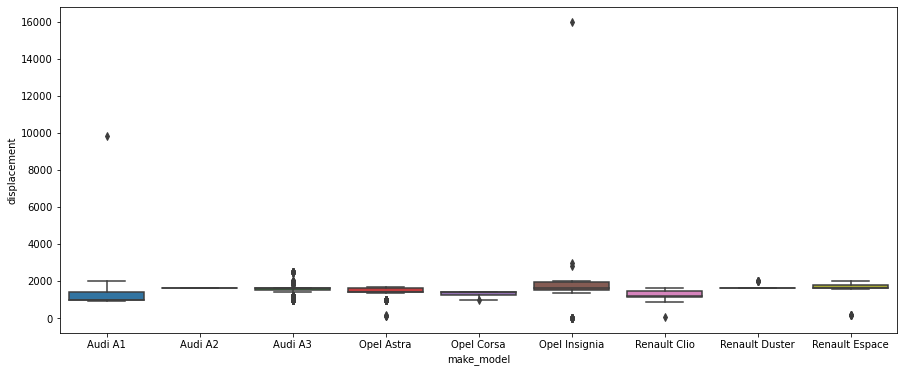

In [24]:
plt.figure(figsize=(15,6))
sns.boxplot(y='displacement',data=df, x='make_model');

In [25]:
df.loc[df.displacement>5000, 'displacement'] = np.nan

In [26]:
df.loc[df.displacement<600, 'displacement'] = np.nan

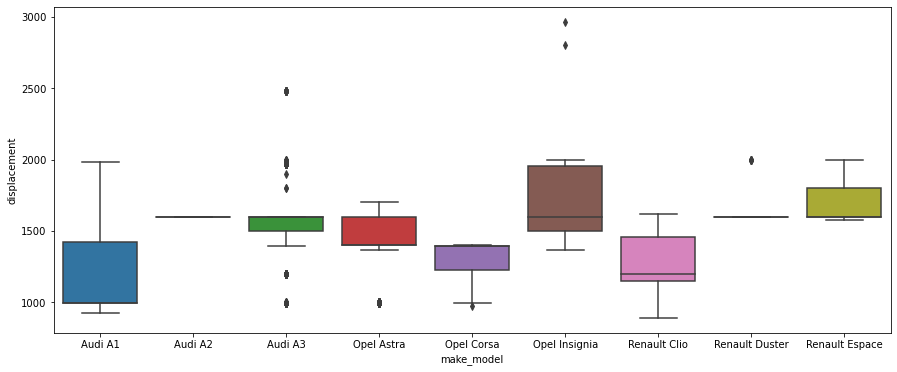

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(y='displacement',data=df, x='make_model');

In [28]:
mode_disp = df.groupby(['make_model','body_type','hp'])['displacement']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [29]:
df["displacement"] = df["displacement"].fillna(mode_disp)

* displacemet values greater than 5000 and less than 600 were converted to null and they were filled according to the groups make_model, body_type and hp.

## cylinders

In [31]:
df["cylinders"].value_counts()

4.0    12438
3.0     3447
5.0       22
6.0        3
2.0        2
8.0        2
1.0        1
Name: cylinders, dtype: int64

In [32]:
df.loc[df["cylinders"]<3,'make_model':'displacement']

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement
9952,Opel Corsa,Compact,16625,VAT deductible,100.0,1.0,66.0,0,0.0,Black,Metallic,3.0,5.0,Automatic,1398.0
11338,Opel Insignia,Station wagon,21900,VAT deductible,13600.0,1.0,100.0,0,0.0,Grey,Metallic,5.0,5.0,Automatic,1598.0
15831,Renault Espace,Van,47590,VAT deductible,6000.0,1.0,147.0,0,0.0,Black,Metallic,5.0,7.0,Automatic,1997.0


In [33]:
df[df.make_model == 'Opel Insignia'].cylinders.value_counts()

4.0    2594
6.0       3
2.0       1
Name: cylinders, dtype: int64

In [34]:
df[df.make_model == 'Opel Corsa'].cylinders.value_counts()

4.0    2170
3.0      45
1.0       1
Name: cylinders, dtype: int64

In [35]:
df.loc[df["cylinders"]<3,'cylinders'] = 4

In [36]:
df.loc[df["cylinders"]>5,'make_model':'cylinders']

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders
535,Audi A1,Compact,12990,VAT undeductible,41200.0,1.0,70.0,1,0.0,Silver,Metallic,5.0,5.0,Manual,999.0,8.0
10767,Opel Insignia,Station wagon,12000,Price negotiable,185000.0,1.0,100.0,0,0.0,White,Metallic,5.0,5.0,Automatic,2967.0,6.0
10822,Opel Insignia,Station wagon,12500,Price negotiable,77500.0,1.0,100.0,0,0.0,Grey,Metallic,5.0,5.0,Automatic,1598.0,6.0
12893,Opel Insignia,Sedans,26500,VAT deductible,5.0,0.0,100.0,0,12.0,Grey,Uni/basic,5.0,5.0,Manual,1600.0,6.0
15051,Renault Espace,Van,24990,VAT undeductible,47423.0,1.0,117.0,0,3.0,Black,Metallic,5.0,5.0,Automatic,1598.0,8.0


In [37]:
df.loc[df.cylinders == 8.0, 'Cylinders'] = 4

* The values 1,2,8 in cylinder column were converted to 4.

## weight

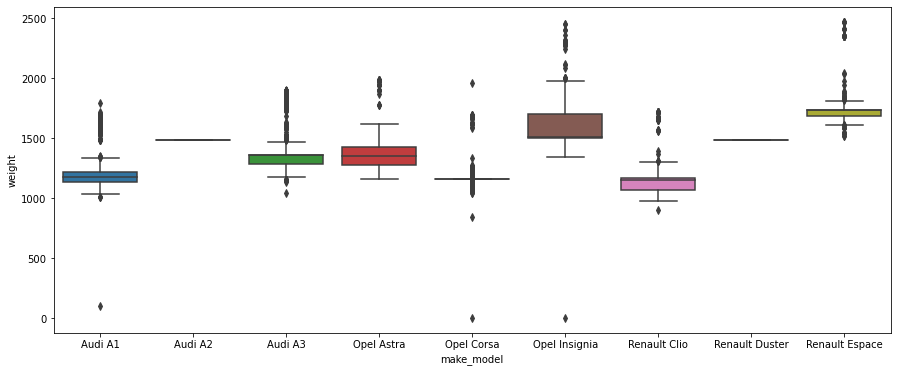

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(y='weight',data=df, x='make_model');

In [39]:
df[df.weight<600]

,make_model,body_type,price,vat,km,prev_owner,hp,inspection_new,warranty,body_color,...,extras,safety_security,gears,electricity_consumption,age,new_used,fuel_type,consumption_comb,upholstery_material,Cylinders
1143,Audi A1,Compact,19229,VAT deductible,8263.0,1.0,70.0,1,36.0,Beige,...,"'Alloy wheels', 'Catalytic Converter', 'Sport ...","'ABS', 'Central door lock', 'Daytime running l...",7.0,0,1.0,Used,benzine,4.6,Cloth,NaN
8354,Opel Corsa,Compact,12945,VAT undeductible,2015.0,1.0,66.0,1,0.0,Silver,...,'Catalytic Converter',"'ABS', 'Central door lock', 'Daytime running l...",5.0,0,1.0,Used,benzine,4.8,Cloth,NaN
12775,Opel Insignia,Station wagon,39299,VAT deductible,10.0,0.0,121.0,0,0.0,Black,...,NaN,"'Fog lights', 'Lane departure warning system'",6.0,0,0.0,New,benzine,6.0,Cloth,NaN


In [53]:
df[df['make_model'] == 'Audi A1']['weight'].mean()

1203.4743687834737

In [54]:
df.loc[1143,'weight'] = 1200

In [55]:
df[df['make_model'] == 'Opel Corsa']['weight'].mean()

1170.3407039711192

In [56]:
df.loc[8354,'weight'] = 1170

In [57]:
df[df['make_model'] == 'Opel Insignia']['weight'].mean()

1591.3768283294842

In [58]:
df.loc[12775,'weight'] = 1591

* weight values less than 600 were converted 

## drive_chain

In [60]:
df.drive_chain.value_counts()

front    15707
4WD        204
rear         4
Name: drive_chain, dtype: int64

## co2_emission

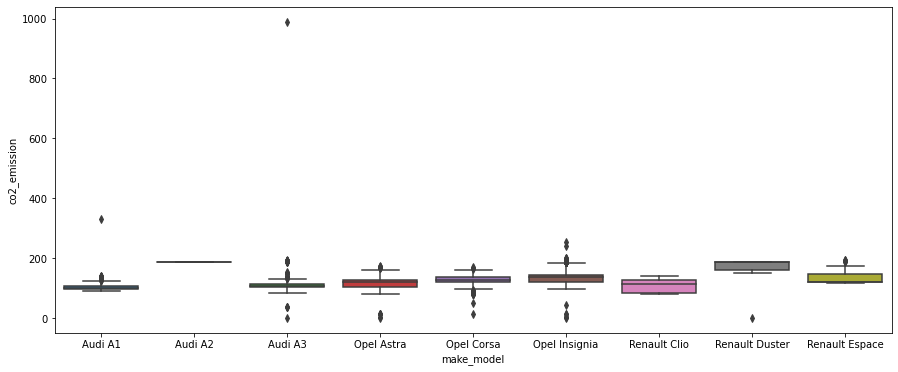

In [61]:
plt.figure(figsize=(15,6))
sns.boxplot(y='co2_emission',data=df, x='make_model');

In [62]:
df.loc[df.co2_emission>300,'co2_emission'] = np.nan

In [63]:
df.loc[df.co2_emission<70,'co2_emission'] = np.nan

In [64]:
mode_CO2 = df.groupby(['make_model','displacement'])['co2_emission']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [65]:
df['co2_emission'] = df['co2_emission'].fillna(mode_CO2)

In [66]:
mode_CO2_1 = df.groupby(['make_model'])['co2_emission']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [67]:
df['co2_emission'] = df['co2_emission'].fillna(mode_CO2_1)

In [68]:
mode_CO2_2 = df.groupby(['body_type'])['co2_emission']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [69]:
df['co2_emission'] = df['co2_emission'].fillna(mode_CO2_2)

* Emission values less than 70 and greater than 300 were converted to null and then filled according to the columns make_model and displacement

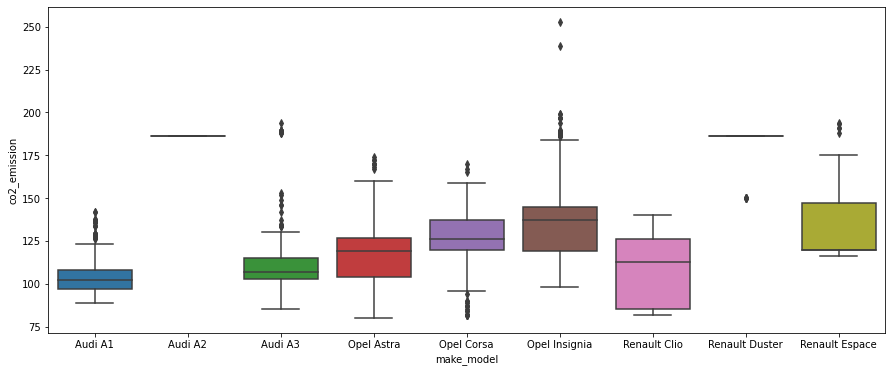

In [72]:
plt.figure(figsize=(15,6))
sns.boxplot(y='co2_emission',data=df, x='make_model');

## Gears

In [72]:
df.gears.value_counts()

6.0     8614
5.0     4253
7.0     2810
8.0      224
9.0        6
4.0        2
3.0        2
1.0        2
50.0       1
2.0        1
Name: gears, dtype: int64

In [73]:
df.loc[df.gears==50,'gears'] = 5

In [74]:
df.loc[df.gears<5,'gears'] = 5

In [75]:
df.gears.value_counts()

6.0    8614
5.0    4261
7.0    2810
8.0     224
9.0       6
Name: gears, dtype: int64

* the gear values less than 5 were assigned as 5.

## consumption_comb

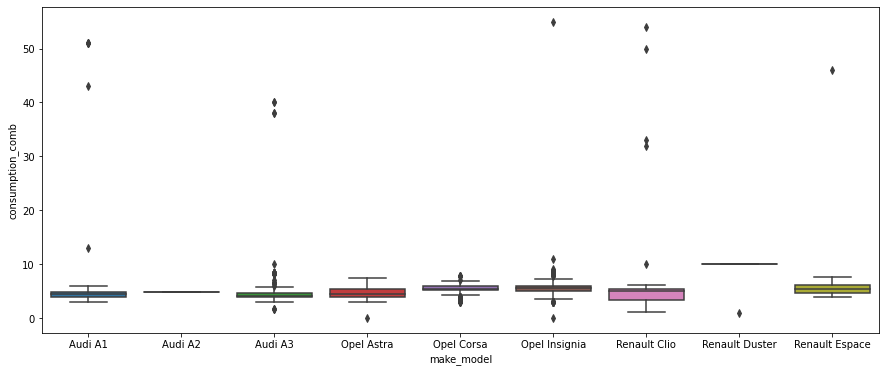

In [76]:
plt.figure(figsize=(15,6))
sns.boxplot(y='consumption_comb',data=df, x='make_model');

In [77]:
df.loc[(df['consumption_comb']>20 ),'consumption_comb'] = np.nan

In [78]:
df.loc[(df['consumption_comb']<3 ),'consumption_comb'] = np.nan

In [79]:
mode_Cons= df.groupby(['co2_emission'])['consumption_comb']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [80]:
df['consumption_comb'] = df['consumption_comb'].fillna(mode_Cons)

In [81]:
mode_Cons1= df.groupby(['displacement'])['consumption_comb']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [82]:
df['consumption_comb'] = df['consumption_comb'].fillna(mode_Cons1)

In [83]:
mode_Cons2= df.groupby(['make_model'])['consumption_comb']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [86]:
df['consumption_comb'] = df['consumption_comb'].fillna(mode_Cons2)

* consumption_comb values greater than 20 and less than 3 were converted to null and then filled according to the columns displacement and make_model

## Filled data was saved to a csv file called auto_scout_outlier.csv

In [90]:
df.to_csv('auto_scout_outlier.csv', index=False)